In [26]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
%cd 'drive/My Drive/Colab Notebooks/Curso algebra lineal aplicada a ML/'

/content/drive/My Drive/Colab Notebooks/Curso algebra lineal aplicada a ML


## Leemos una de las imagenes

In [19]:
im = imageio.imread('./imagenes/s3/3.pgm')
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [20]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [21]:
im_original = im
im = im / 255

In [22]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


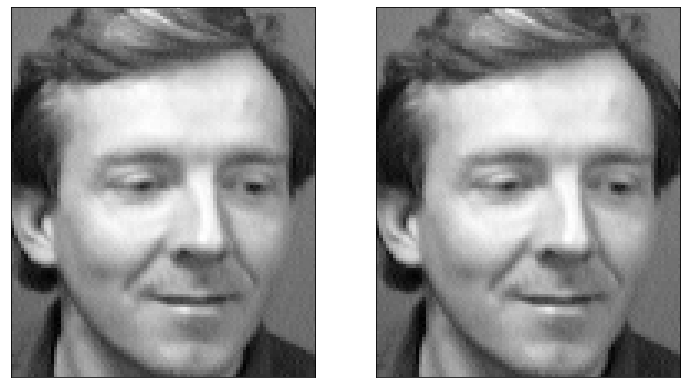

In [32]:
fix, ax = plt.subplots(1,2, figsize=(12,12),
                       subplot_kw = {'xticks': [], 'yticks': []})

ax[0].imshow(im_original, cmap = "gray")
ax[1].imshow(im, cmap = "gray")


## Leer todas las imagenes en el directorio

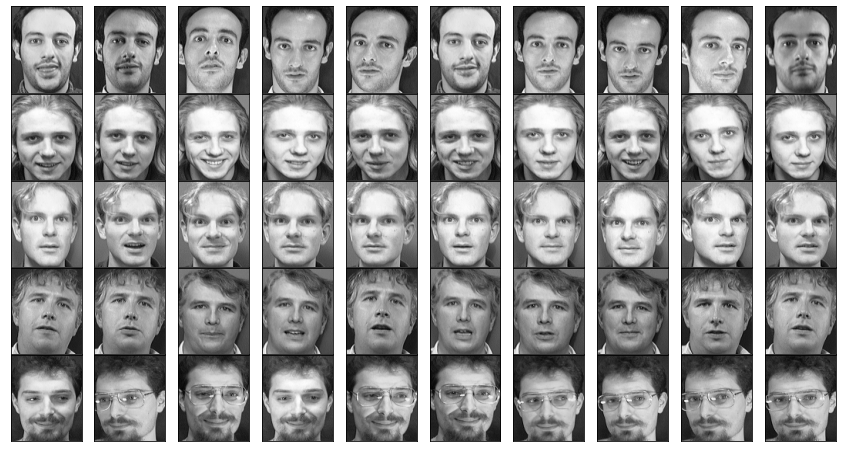

In [41]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('./imagenes/*/*.pgm'):
    im =  imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)

fig, axes = plt.subplots(5, 10, figsize=(15,8),
                        subplot_kw = {'xticks': [], 'yticks': []}, 
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(caras.iloc[i].values.reshape(112,92),cmap='gray')

# Apliquemos PCA a un conjunto de imágenes


In [42]:
from sklearn.decomposition import PCA

In [54]:
caras_pca = PCA(n_components = 0.999)

caras_pca.fit(caras)

PCA(copy=True, iterated_power='auto', n_components=0.999, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

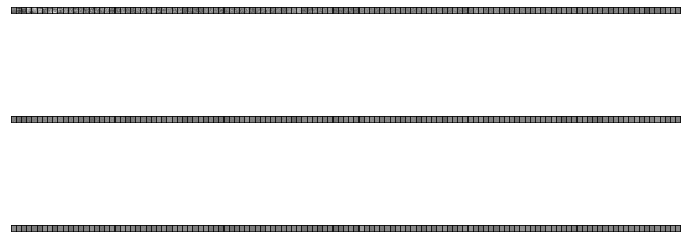

In [55]:
filas =3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12,6),
                        subplot_kw = {'xticks': [], 'yticks': []}, 
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(caras_pca.components_[i].reshape(112,92),cmap='gray')

In [56]:
print(caras_pca.n_components_)

388


In [57]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

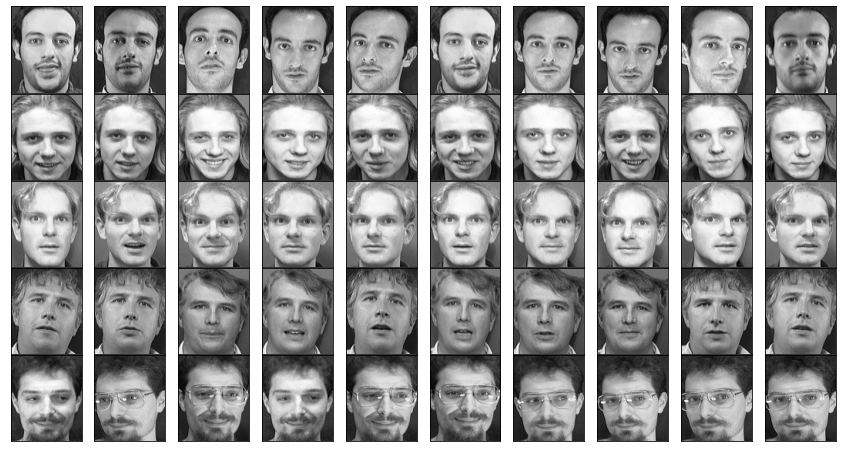

In [58]:
fig, axes = plt.subplots(5, 10, figsize=(15,8),
                        subplot_kw = {'xticks': [], 'yticks': []}, 
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
  ax.imshow(proyeccion[i].reshape(112,92),cmap='gray')

Con 44 componentes podemos recuperar el 80% de la informacion.

Con un conjunto de datos muy pequeño, el aumentar la cantidad de informacion que queremos conservar aumentar drasticamente el tiempo de computacion para obtener el mismo numero de resultados